In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("../data/vehicle.csv").rename(columns=str.lower)
df

,comp,circ,d.circ,rad.ra,pr.axis.ra,max.l.ra,scat.ra,elong,pr.axis.rect,max.l.rect,sc.var.maxis,sc.var.maxis,ra.gyr,skew.maxis,skew.maxis,kurt.maxis,kurt.maxis,holl.ra,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
base_models = {
    "Decision Tree (max_depth=10)": DecisionTreeClassifier(
        max_depth=10, random_state=42
    ),
    "Decision Tree (max_depth=5)": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Decision Tree (max_depth=3)": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Decision Tree (max_depth=1)": DecisionTreeClassifier(max_depth=1, random_state=42),
    "SVM": SVC(kernel="rbf", C=1.0, probability=True, random_state=42),
    "LogisticRegression L2": LogisticRegression(random_state=42),
    "LogisticRegression without regularization": LogisticRegression(
        random_state=42, penalty=None
    ),
}

In [8]:
import numpy as np

In [21]:
n_estimators_range = np.arange(1, 101, 5)

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
train_df, test_df = train_test_split(
    df, random_state=42, shuffle=True, test_size=0.25, stratify=df["class"]
)

In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(train_df.drop("class", axis=1))
X_test_scaled = sc.transform(test_df.drop("class", axis=1))

In [17]:
y_train, y_test = train_df["class"], test_df["class"]

In [18]:
import matplotlib.pyplot as plt

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
import datetime

In [43]:
import warnings

In [44]:
warnings.filterwarnings("ignore")

2025-05-14 20:09:07.201949 	 Decision Tree (max_depth=10)
2025-05-14 20:09:14.447798 	 Decision Tree (max_depth=5)
2025-05-14 20:09:19.144421 	 Decision Tree (max_depth=3)
2025-05-14 20:09:22.716584 	 Decision Tree (max_depth=1)
2025-05-14 20:09:25.224971 	 SVM
2025-05-14 20:11:18.592832 	 LogisticRegression L2
2025-05-14 20:11:24.276320 	 LogisticRegression without regularization


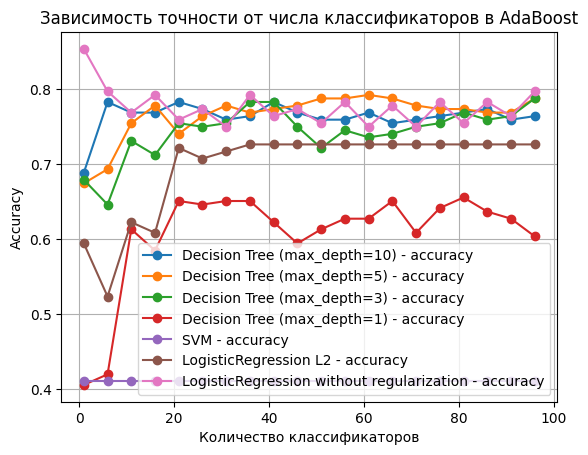

CPU times: user 6min 23s, sys: 230 ms, total: 6min 24s
Wall time: 2min 43s


In [45]:
%%time

for model_name, model in base_models.items():
    print(f"{datetime.datetime.now()} \t {model_name}")
    accuracies, f1_scores = [], []

    for n in n_estimators_range:
        ada = AdaBoostClassifier(estimator=model, n_estimators=n, random_state=42)
        ada.fit(X_train_scaled, y_train)
        y_pred = ada.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average="macro"))

    plt.plot(
        n_estimators_range, accuracies, marker="o", label=f"{model_name} - accuracy"
    )
    # plt.plot(n_estimators_range, f1_scores, marker='o', label=f"{model_name} - f1-macro")

plt.title("Зависимость точности от числа классификаторов в AdaBoost")
plt.xlabel("Количество классификаторов")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()